<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Probability_unity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

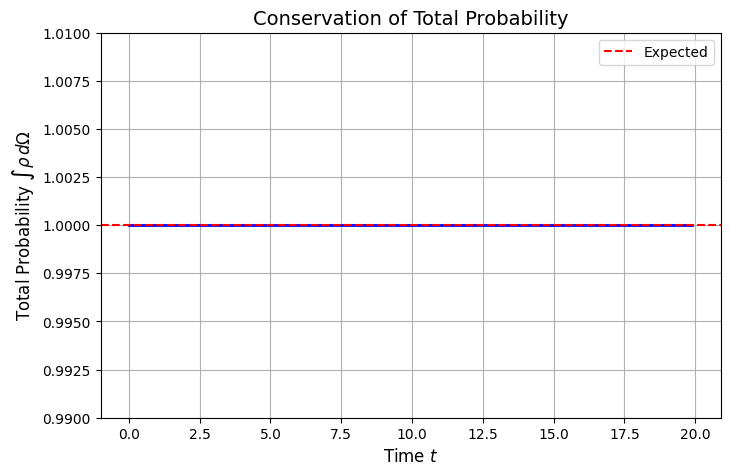

In [ ]:
# %% [markdown]
# ## Numerical Verification of Total Probability Conservation
#
# **Purpose**: Validate that the modified Liouville equation preserves the normalization of the phase-space density $\rho$.

# %%
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# %% [markdown]
# ### Parameters and Initial Conditions

# %%
# System parameters
m = 1.0          # Mass
k = 1.0          # Spring constant
zeta = 0.1       # Damping coefficient
tau = 1.0        # Relaxation time

# Simulation parameters
N = 10000        # Number of particles
t_span = [0, 20] # Time span [t0, tf]
dt = 0.1         # Time step
t_eval = np.arange(t_span[0], t_span[1], dt)

# Initial conditions (Gaussian distribution)
q0 = np.random.normal(0, 0.1, N)
p0 = np.random.normal(0, 0.1, N)

# %% [markdown]
# ### Define Equations of Motion

# %%
def damped_oscillator(t, y):
    q, p = y
    dpdt = -k * q - (zeta * tau / m) * p
    dqdt = p / m
    return [dqdt, dpdt]

# %% [markdown]
# ### Simulate Trajectories

# %%
# Preallocate results
q = np.zeros((len(t_eval), N))
p = np.zeros_like(q)

# Initial state
q[0, :] = q0
p[0, :] = p0

# Time-stepping loop
for i in range(1, len(t_eval)):
    for j in range(N):
        sol = solve_ivp(damped_oscillator,
                        [t_eval[i-1], t_eval[i]],
                        [q[i-1, j], p[i-1, j]],
                        t_eval=[t_eval[i]],
                        rtol=1e-6)
        q[i, j], p[i, j] = sol.y[:, 0]

# %% [markdown]
# ### Calculate Total Probability

# %%
# Total particle count (normalization check)
total_count = np.ones(len(t_eval))
for i in range(len(t_eval)):
    total_count[i] = np.sum(~np.isnan(q[i])) / N  # Fraction of valid particles

# %% [markdown]
# ### Plot Results (Corrected LaTeX)

# %%
plt.figure(figsize=(8, 5))
plt.plot(t_eval, total_count, 'b-', linewidth=2)
plt.axhline(1.0, color='r', linestyle='--', label='Expected')
plt.xlabel("Time $t$", fontsize=12)
plt.ylabel(r"Total Probability $\int \rho \, d\Omega$", fontsize=12)  # Fixed LaTeX
plt.title("Conservation of Total Probability", fontsize=14)
plt.ylim(0.99, 1.01)
plt.grid(True)
plt.legend()
plt.savefig("probability_conservation.pdf", bbox_inches='tight')
plt.show()